## Birthrate Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams

In [2]:
births=pd.read_csv('births.csv')

In [3]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
births.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


#### replacing na values with 0

In [5]:
births.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [6]:
births['day'].fillna(0, inplace=True)

#### changing data type

In [7]:
births['day'] = births['day'].astype(int)
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15547 non-null  int64 
 1   month   15547 non-null  int64 
 2   day     15547 non-null  int32 
 3   gender  15547 non-null  object
 4   births  15547 non-null  int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 546.7+ KB


#### calculating decade for each year

In [8]:
births['decade']=10*(births['year']//10)

#### gender by decade

creating pivot table

In [9]:
birth_gender=births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
birth_gender

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


plotting graph

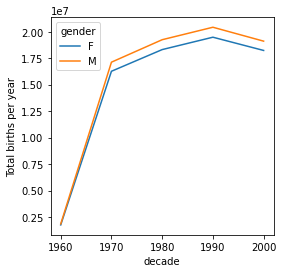

In [10]:
rcParams['figure.figsize'] = (4,4)  
birth_gender.plot()
plt.ylabel("Total births per year")
plt.show()

#### removing outliers

In [11]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mean = quartiles[1]
sigma = 0.74 * (quartiles[2] - quartiles[0]) #0.74 is interquartile range of normal distribution

use query() to filter out rows with births outside this value

In [12]:
births = births.query('(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)')
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day,
                              format='%Y%m%d')
# @ is used to specify variable defined outside query

#### Average births by day of week

adding day of week column

In [13]:
births['day of week'] = births.index.dayofweek

creating pivot table

In [14]:
births_day = births.pivot_table('births', index='day of week',columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day

decade,1960,1970,1980
Mon,5063.826923,4689.097701,5276.907249
Tues,5286.096154,4885.252399,5503.842553
Wed,5074.622642,4750.376200,5367.642553
Thurs,4978.288462,4696.923372,5333.485106
Fri,5107.884615,4782.095785,5393.087234
Sat,4651.057692,4207.784483,4483.901064
Sun,4342.346154,3979.278736,4308.120469


visualisation

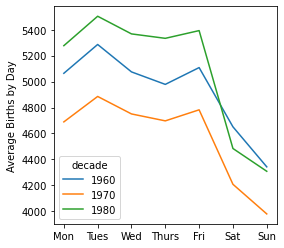

In [15]:
births_day.plot()
plt.ylabel("Average Births by Day")
plt.show()

we can see that births were less common on weekends as compared to weekdays

#### average births by day of year

In [16]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.Timestamp(2000, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2000-01-01  4009.225
2000-01-02  4247.400
2000-01-03  4500.900
2000-01-04  4571.350
2000-01-05  4603.625


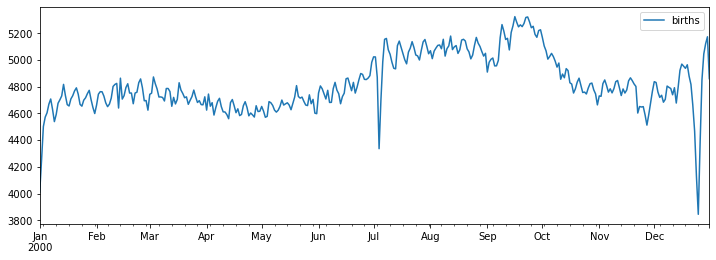

In [17]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()